In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = fetch_california_housing()
input_x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [10]:
input_x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(input_x, y, test_size=0.25, random_state=42)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[ 0.17648852,  0.66640687, -0.06085431, ..., -0.04828325,
        -0.8607415 ,  0.73099911],
       [ 0.77137436,  1.06288858,  0.38352076, ..., -0.05872947,
         0.70916822, -1.19670983],
       [ 0.02142423,  0.58711053,  0.27852339, ..., -0.07283798,
         1.31370062, -1.55128842],
       ...,
       [-0.49582442,  0.58711053, -0.5983225 , ...,  0.01885405,
        -0.75764295,  0.60115343],
       [ 0.96699069, -1.07811266,  0.39633361, ...,  0.0060417 ,
         0.90599273, -1.1867217 ],
       [-0.68434939,  1.855852  , -0.83954627, ..., -0.08347358,
         0.99503238, -1.41644868]], shape=(15480, 8))

In [52]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test_scaled)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [55]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.5240
R² Score: 0.6040


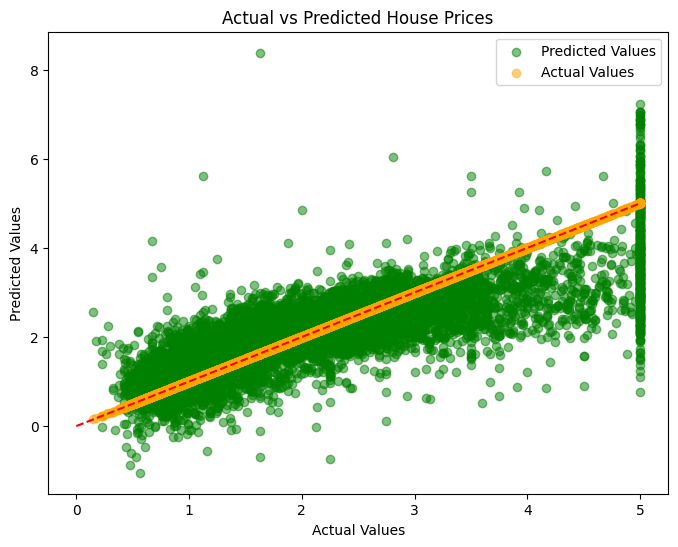

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="green", label="Predicted Values")  # Change to green
plt.scatter(y_test, y_test, alpha=0.5, color="orange", label="Actual Values")  # Orange for actual values

plt.plot([0, 5], [0, 5], "--r")  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted House Prices")
plt.show()

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print(f"Ridge Regression R² Score: {r2_score(y_test, y_pred_ridge):.4f}")


Ridge Regression R² Score: 0.6011


In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.1, 1, 10, 100]  # Different regularization strengths
best_alpha = None
best_mse = float("inf")

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha: {alpha}, MSE: {mse:.4f}")
    
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print(f"Best alpha: {best_alpha}, Best MSE: {best_mse:.4f}")


Alpha: 0.01, MSE: 0.5341
Alpha: 0.1, MSE: 0.5341
Alpha: 1, MSE: 0.5341
Alpha: 10, MSE: 0.5339
Alpha: 100, MSE: 0.5340
Best alpha: 10, Best MSE: 0.5339
